MODELO ESTRUCTURAL DE OPENSEESPY

Paso 1: Importación de librerías

In [17]:
# ============================================
# IMPORTAR LIBRERÍAS
# ============================================
import openseespy.opensees as ops
import opsvis as opsv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv as csv


Paso 2: Limpieza de modelo

In [18]:
# ============================================
# LIMPIAR MODELO ANTERIOR
# ============================================
# Esto asegura que no haya datos de modelos previos
ops.wipe()

Paso 3: Creación de Modelo

In [19]:
# ============================================
# CREAR MODELO
# ============================================
# 'basic': tipo de modelo
# '-ndm', 3: número de dimensiones (3D)
# '-ndf', 6: grados de libertad por nodo (x, y, z, rotX, rotY, rotZ)
ops.model('basic', '-ndm',3, '-ndf',6)

# Definición de transformaciones geométricas
ops.geomTransf("Linear",1,*[1,0,0]) #Transformación para columnas
ops.geomTransf("Linear",2,*[0,0,1]) #Transformación para vigas


print("Modelo 3D creado exitosamente")



Modelo 3D creado exitosamente


Paso 4: Definición de sistema de unidades

In [20]:
# ============================================
# DEFINICIÓN DE SISTEMA DE UNIDADES
# ============================================
#Las unidades estándar del proyecto serán kN,m,seg
#Se definen los factores de conversión de unidades

ops.defaultUnits("-force", "kN", "-length", "m", "-time", "sec", "-temp", "C")
kN = 1
m = 1
seg=1
cm = 0.01
mm = 0.001
N = 1000
kgf = 101.9716
tonf = 1000*kgf
MPa = 1000*kN/m**2
GPa = 1000000*kN/m**2
g = 9.81*m/seg**2

Paso X: Definición de Geometría

In [21]:
# ============================================
# DEFINICIÓN DE GEOMETRÍA
# ============================================

L12=4.50*m  #Longitud entre ejes 1 y 2
L23=6.50*m  #Longitud entre ejes 2 y 3
L34=6.50*m  #Longitud entre ejes 3 y 4
L45=4.45*m  #Longitud entre ejes 4 y 5

LAB=5.75*m  #Longitud entre ejes A y B
LBC=5.75*m  #Longitud entre ejes B y C

H1=3.10*m   #Altura piso 1
H2=3.10*m   #Altura piso 2
H3=3.10*m   #Altura piso 3

Apiso = ( L12 + L23 + L34 + L45 ) * ( LAB + LBC )  # Área del entrepiso

PasoX : Definición de acero de refuero

In [22]:
# ============================================
# DEFINICIÓN DE BARRAS DE REFUERZO
# ============================================
DbarNo3=9.5*mm             # Diámetro de barra de refuerzo #3
AbarNo3=71*mm**2           # Área de barra de refuerzo #3
DbarNo4=12.7*mm            # Diámetro de barra de refuerzo #4
AbarNo4=129*mm**2          # Área de barra de refuerzo #4
DbarNo5=15.9*mm            # Diámetro de barra de refuerzo #5
AbarNo5=199*mm**2          # Área de barra de refuerzo #5
DbarNo6=19.1*mm            # Diámetro de barra de refuerzo #6
AbarNo6=284*mm**2          # Área de barra de refuerzo #6
DbarNo7=22.2*mm            # Diámetro de barra de refuerzo #7
AbarNo7=387*mm**2          # Área de barra de refuerzo #7
DbarNo8=25.4*mm            # Diámetro de barra de refuerzo #8
AbarNo8=510*mm**2          # Área de barra de refuerzo #8

# ============================================
# DEFINICIÓN DE MATERIAL DE ACERO DE REFUERZO
# ============================================

#1.Acero de refuerzo usando el modelo ReinforcingSteel
#Filippou, F. C., Popov, E. P., & Bertero, V. V. (1983). Effects of bond deterioration on hysteretic behavior of reinforced concrete joints.
fy=420*MPa        # Límite elástico
Es=200*GPa        # Módulo de elasticidad
endur=0.01        # Pendiente de endurecimiento
R0 = 20           # Parámetro de forma (típico: 15-25)
cR1 = 0.925       # Parámetro de control de transición
cR2 = 0.15        # Parámetro de control de transición
ops.uniaxialMaterial('Steel02', 1, fy, Es,endur,R0, cR1, cR2)

# ==================================
# PROPIEDADES DEL ACERO DE ESTRIBOS
# ==================================

fyh=420*MPa                # Límite elástico del acero de estribos
haRatio=0                  # Tasa de endurecimiento del acero de estribos 
mu=1000                    # Factor de ductilidad del acero de estribos


Paso X:Definición de sección transversal de vigas

21000 0.85 2.15381e+07 0 0 0.000345038 17850 -0.000150757 -4538.52 203.231 8032.5 12.15381e+07
0.01 0 0.05 2 0 0.000345038 17850 -0.000150757 -4538.52 203.231 0.0191 7 2 1e-06 500


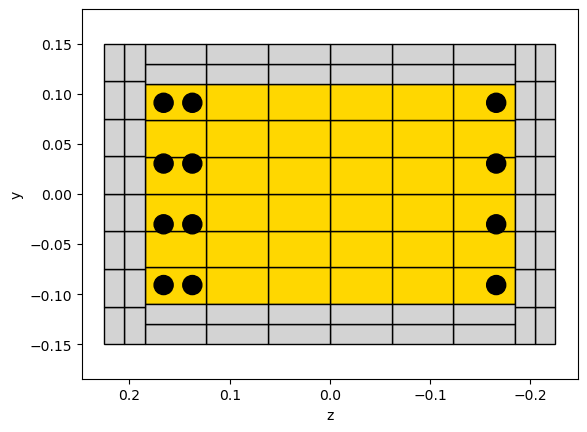

In [23]:
# ==============================================
# DEFINICIÓN DE GEOMETRÍA DE SECCIÓN TRANSVERSAL
# ==============================================

#1.Sección de viga concreto rectangular maciza con dimensiones b1 x h1 y refuerzo superior con doble fila de 4 barras #6 e inferior 4 barras #6 y estribos #3 
b1=0.30*m                  # Ancho de la sección trasversal 1
h1=0.45*m                  # Alto de la sección transversal 1
rec1=0.04*m                # Recubrimiento de concreto
nb1=b1-(2*rec1)            # Ancho de núcleo de la sección transversal 1
nh1=h1-(2*rec1)            # Alto de núcleo de la sección transversal 1
Ecprom=24738*MPa           # Módulo de elasticidad promedio del concreto - entre 21 y 35 MPa
ν=0.15                     # Módulo de Poisson
G=Ecprom/(2*(1+ν))         # Módulo de cortante
J=(b1*h1**3/16)*(1/3-0.21*(h1/b1)*(1-(h1/b1)**4/12))  #Momento polar de inercia torsional

# ===============================================
# DEFINICIÓN DE MATERIALES DE SECCIÓN TRANSVERSAL
# ===============================================

#2.Concreto para zona inconfinada usando el modelo Concrete02 - f'c= 21 MPa
# Mander, J. B., Priestley, M. J. N., & Park, R. (1988). Theoretical stress-strain model for confined concrete.
k2=1.00                    # Factor de confinamiento de Mander
fc2=-21*MPa                # Resistencia a la compresión inconfinada
fck2=k2*fc2                # Resistencia a la compresión característica
Ec2=4700000*(abs(fck2/1000))**0.5  # Módulo de elasticidad del concreto
epsc02=-0.002              # Deformación unitaria en resistencia máxima
fpcu2=-0.25*fc2            # Resistencia última a compresión
epscu2=-0.010              # Deformación unitaria en resistencia última
lambdaC2=0.1               # Pendiente post pico tensil
ft2=0.1*fc2                # Resistencia a tracción(10%*f'c)
Ets2=0.02*Ec2              # Módulo de elasticidad en tracción(2%*Ec)
ops.uniaxialMaterial('Concrete02', 2, fck2, epsc02, fpcu2, epscu2, lambdaC2,ft2,Ets2)

#3.Concreto para zona confinada usando el modelo ConfinedConcrete01 - f'c= 21 MPa
# Mander, J. B., Priestley, M. J. N., & Park, R. (1988). Theoretical stress-strain model for confined concrete.
fc3=-21*MPa                # Resistencia a la compresión inconfinada
Ec3=4700000*(abs(fc3/1000))**0.5   # Módulo de elasticidad del concreto
epscu3=-0.010              # Deformación unitaria en resistencia última
S1=(h1-rec1)/4             # Separación entre estribos
philon1=DbarNo6            # Diámetro de las barras longitudinales en la sección 
ops.uniaxialMaterial('ConfinedConcrete01', 3, 'R', fc3, Ec3, '-epscu', epscu3, '-varnoub', nh1, nb1, DbarNo3, S1,fyh,Es,haRatio,mu,philon1,'-stRatio', 0.85)

# ==================================
# DEFINICIÓN DE SECCIÓN TRANSVERSAL
# ==================================

seccion1=[['section', 'Fiber', 1,'-GJ',G*J],
          ['patch', 'rect', 3, 6, 6, -nb1/2,-nh1/2,nb1/2,nh1/2],   # Núcleo de concreto
          ['patch', 'rect', 2, 2, 6, nb1/2,-nh1/2,b1/2,nh1/2],     # Recubrimiento derecho
          ['patch', 'rect', 2, 2, 6, -b1/2,-nh1/2,-nb1/2,nh1/2],   # Recubrimiento izquierdo
          ['patch', 'rect', 2, 8, 2, -b1/2,nh1/2,b1/2,h1/2],       # Recubrimiento superior
          ['patch', 'rect', 2, 8, 2, -b1/2,-h1/2,b1/2,-nh1/2],     # Recubrimiento inferior
          ['layer', 'straight', 1, 4, AbarNo6, -nb1/2+DbarNo3+DbarNo6/2,nh1/2-DbarNo3-DbarNo6/2,nb1/2-DbarNo3-DbarNo6/2,nh1/2-DbarNo3-DbarNo6/2],       # Refuerzo superior fila1
          ['layer', 'straight', 1, 4, AbarNo6, -nb1/2+DbarNo3+DbarNo6/2,nh1/2-DbarNo3-4*DbarNo6/2,nb1/2-DbarNo3-DbarNo6/2,nh1/2-DbarNo3-4*DbarNo6/2],       # Refuerzo superior fila2
          ['layer', 'straight', 1, 4, AbarNo6, -nb1/2+DbarNo3+DbarNo6/2,-nh1/2+DbarNo3+DbarNo6/2,nb1/2-DbarNo3-DbarNo6/2,-nh1/2+DbarNo3+DbarNo6/2]]     # Refuerzo inferior
opsv.fib_sec_list_to_cmds(seccion1)                       # Utilizar la lista para definir la sección 1 en OpenSees
matcolor1 = ['r', 'lightgrey', 'gold', 'w', 'w', 'w']     # Colores para cada material en la sección 1
opsv.plot_fiber_section(seccion1, matcolor=matcolor1)     # Graficar la sección 1
#plt.axis('equal')                                        # Mantener proporciones iguales en los ejes
#plt.show()                                               # Mostrar la gráfica

Paso 6: Definición de sección transversal de columnas

28000 0.85 2.48701e+07 0 0 0.000370767 23800 -0.000193997 -7215.33 246.433 10710 12.48701e+07
0.01 0 0.05 2 0 0.000370767 23800 -0.000193997 -7215.33 246.433 0.0254 7 2 1e-06 500


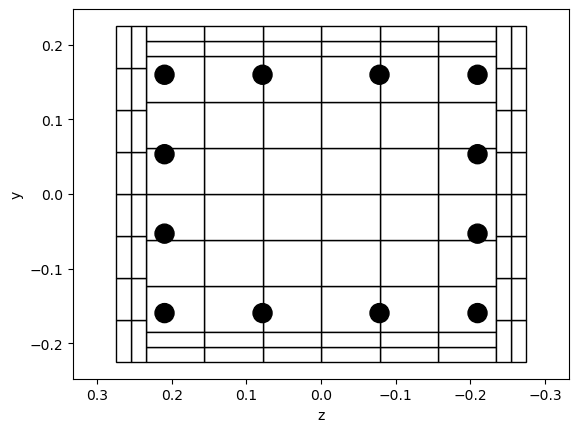

In [24]:
# ==============================================
# DEFINICIÓN DE GEOMETRÍA DE SECCIÓN TRANSVERSAL
# ==============================================

#2.Sección 2 - columna concreto rectangular maciza con dimensiones b2 x h2 y refuerzo de 12 barras #8 y estribos #4 
b2=0.45*m                  # Ancho de la sección trasversal 2
h2=0.55*m                  # Alto de la sección transversal 2
rec2=0.04*m                # Recubrimiento de concreto
nb2=b2-(2*rec2)            # Ancho de núcleo de la sección transversal 2
nh2=h2-(2*rec2)            # Alto de núcleo de la sección transversal 2
Ecprom=24738*MPa           # Módulo de elasticidad promedio del concreto - entre 21 y 35 MPa
ν=0.15                     # Módulo de Poisson
G=Ecprom/(2*(1+ν))         # Módulo de cortante
J=(b2*h2**3/16)*(1/3-0.21*(h2/b2)*(1-(h2/b2)**4/12))  #Momento polar de inercia torsional

# ===============================================
# DEFINICIÓN DE MATERIALES DE SECCIÓN TRANSVERSAL
# ===============================================

#4.Concreto para zona inconfinada usando el modelo Concrete02 - f'c= 28 MPa
# Mander, J. B., Priestley, M. J. N., & Park, R. (1988). Theoretical stress-strain model for confined concrete.
k4=1.00                    # Factor de confinamiento de Mander
fc4=-28*MPa                # Resistencia a la compresión inconfinada
fck4=k4*fc4                # Resistencia a la compresión característica
Ec4=4700*1000*(abs(fck4/1000))**0.5  # Módulo de elasticidad del concreto
epsc04=-0.002              # Deformación unitaria en resistencia máxima
fpcu4=-0.25*fc4            # Resistencia última a compresión
epscu4=-0.010              # Deformación unitaria en resistencia última
lambdaC4=0.1               # Pendiente post pico tensil
ft4=0.1*fc4                # Resistencia a tracción(10%*f'c)
Ets4=0.02*Ec4              # Módulo de elasticidad en tracción(2%*Ec)
ops.uniaxialMaterial('Concrete02', 4, fck4, epsc04, fpcu4, epscu4, lambdaC4,ft4,Ets4)

#5.Concreto para zona confinada usando el modelo Concrete02 - f'c= 28 MPa
# Mander, J. B., Priestley, M. J. N., & Park, R. (1988). Theoretical stress-strain model for confined concrete.
fc5=-28*MPa                # Resistencia a la compresión inconfinada
Ec5=4700000*(abs(fc5/1000))**0.5   # Módulo de elasticidad del concreto
epscu5=-0.010              # Deformación unitaria en resistencia última
S2=(h2-rec2)/4             # Separación entre estribos
philon2=DbarNo8            # Diámetro de las barras longitudinales en la sección 
ops.uniaxialMaterial('ConfinedConcrete01', 5, 'R', fc5, Ec5, '-epscu', epscu5, '-varnoub', nh2, nb2, DbarNo3, S2,fyh,Es,haRatio,mu,philon2,'-stRatio', 0.85)

seccion2=[['section', 'Fiber', 2,'-GJ',G*J],
          ['patch', 'rect', 5, 6, 6, -nb2/2,-nh2/2,nb2/2,nh2/2],    # Núcleo de concreto
          ['patch', 'rect', 4, 2, 6, nb2/2,-nh2/2,b2/2,nh2/2],      # Recubrimiento derecho
          ['patch', 'rect', 4, 2, 6, -b2/2,-nh2/2,-nb2/2,nh2/2],    # Recubrimiento izquierdo
          ['patch', 'rect', 4, 8, 2, -b2/2,nh2/2,b2/2,h2/2],        # Recubrimiento superior
          ['patch', 'rect', 4, 8, 2, -b2/2,-h2/2,b2/2,-nh2/2],      # Recubrimiento inferior
          ['layer', 'straight', 1, 4, AbarNo8, -nb2/2+DbarNo4+DbarNo8/2,nh2/2-DbarNo4-DbarNo8/2,nb2/2-DbarNo4-DbarNo8/2,nh2/2-DbarNo4-DbarNo8/2],     # Refuerzo superior
          ['layer', 'straight', 1, 2, AbarNo8, -nb2/2+DbarNo4+DbarNo8/2,nh2/2-nh2/3,nb2/2-DbarNo4-DbarNo8/2,nh2/2-nh2/3],                             # Refuerzo fila 2
          ['layer', 'straight', 1, 2, AbarNo8, -nb2/2+DbarNo4+DbarNo8/2,-nh2/2+nh2/3,nb2/2-DbarNo4-DbarNo8/2,-nh2/2+nh2/3],                           # Refuerzo fila 3
          ['layer', 'straight', 1, 4, AbarNo8, -nb2/2+DbarNo4+DbarNo8/2,-nh2/2+DbarNo4+DbarNo8/2,nb2/2-DbarNo4-DbarNo8/2,-nh2/2+DbarNo4+DbarNo8/2]]   # Refuerzo fila inferior
opsv.fib_sec_list_to_cmds(seccion2)                     # Utilizar la lista para definir la sección 2 en OpenSees
matcolor2 = ['r', 'lightgrey', 'gold', 'w', 'w', 'w']   # Colores para cada material en la sección 2
opsv.plot_fiber_section(seccion2, matcolor=matcolor2)   # Graficar la sección 2
#plt.axis('equal')                                      # Mantener proporciones iguales en los ejes
#plt.show()                                             # Mostrar la gráfica

Paso X: Definición de nodos

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

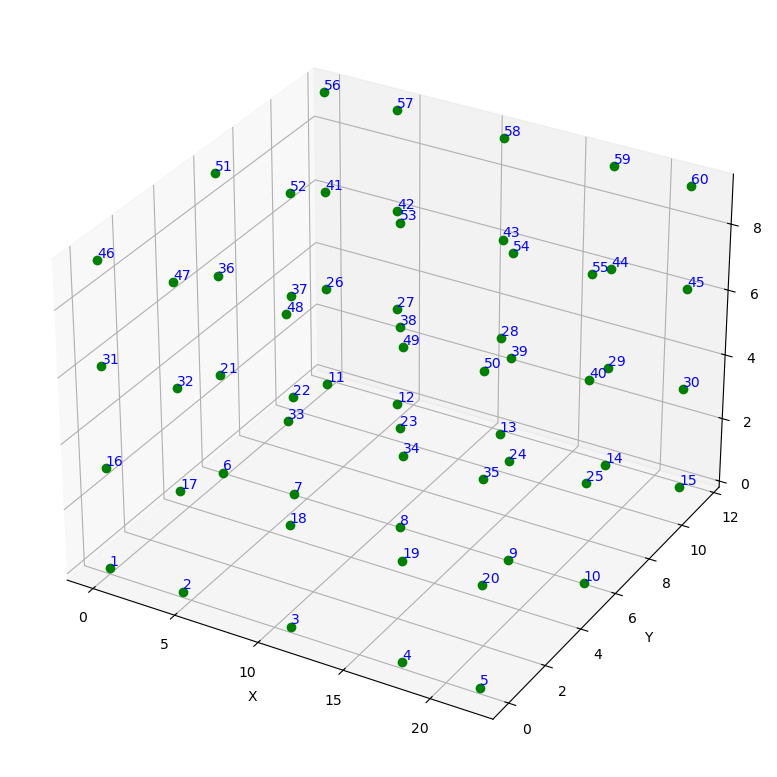

In [25]:
# ============================================
# DEFINICIÓN DE NODOS
# ============================================

#NODOS PISO 1
ops.node(1, 0, 0, 0)                      #Nodo 1
ops.node(2, L12, 0, 0)                    #Nodo 2
ops.node(3, L12+L23, 0, 0)                #Nodo 3
ops.node(4, L12+L23+L34, 0, 0)            #Nodo 4
ops.node(5, L12+L23+L34+L45, 0, 0)        #Nodo 5
ops.node(6, 0, LAB, 0)                    #Nodo 6
ops.node(7, L12, LAB, 0)                  #Nodo 7
ops.node(8, L12+L23, LAB, 0)              #Nodo 8
ops.node(9, L12+L23+L34, LAB, 0)          #Nodo 9
ops.node(10, L12+L23+L34+L45, LAB, 0)     #Nodo 10
ops.node(11, 0, LAB+LBC, 0)               #Nodo 11
ops.node(12, L12, LAB+LBC, 0)             #Nodo 12
ops.node(13, L12+L23, LAB+LBC, 0)         #Nodo 13
ops.node(14, L12+L23+L34, LAB+LBC, 0)     #Nodo 14
ops.node(15, L12+L23+L34+L45, LAB+LBC, 0) #Nodo 15
nodos_piso1 = list(range(1,16))           #Lista de nodos del piso 1

#NODOS PISO 2
ops.node(16, 0, 0, H1)                     #Nodo 16
ops.node(17, L12, 0, H1)                   #Nodo 17
ops.node(18, L12+L23, 0, H1)               #Nodo 18
ops.node(19, L12+L23+L34, 0, H1)           #Nodo 19
ops.node(20, L12+L23+L34+L45, 0, H1)       #Nodo 20
ops.node(21, 0, LAB, H1)                   #Nodo 21
ops.node(22, L12, LAB, H1)                 #Nodo 22
ops.node(23, L12+L23, LAB, H1)             #Nodo 23
ops.node(24, L12+L23+L34, LAB, H1)         #Nodo 24
ops.node(25, L12+L23+L34+L45, LAB, H1)     #Nodo 25
ops.node(26, 0, LAB+LBC, H1)               #Nodo 26
ops.node(27, L12, LAB+LBC, H1)             #Nodo 27
ops.node(28, L12+L23, LAB+LBC, H1)         #Nodo 28
ops.node(29, L12+L23+L34, LAB+LBC, H1)     #Nodo 29
ops.node(30, L12+L23+L34+L45, LAB+LBC, H1) #Nodo 30
nodos_piso2 = list(range(16,31))           #Lista de nodos del piso 2

#NODOS PISO 3
ops.node(31, 0, 0, H1+H2)                     #Nodo 31
ops.node(32, L12, 0, H1+H2)                   #Nodo 32
ops.node(33, L12+L23, 0, H1+H2)               #Nodo 33
ops.node(34, L12+L23+L34, 0, H1+H2)           #Nodo 34
ops.node(35, L12+L23+L34+L45, 0, H1+H2)       #Nodo 35
ops.node(36, 0, LAB, H1+H2)                   #Nodo 36
ops.node(37, L12, LAB, H1+H2)                 #Nodo 37
ops.node(38, L12+L23, LAB, H1+H2)             #Nodo 38
ops.node(39, L12+L23+L34, LAB, H1+H2)         #Nodo 39
ops.node(40, L12+L23+L34+L45, LAB, H1+H2)     #Nodo 40
ops.node(41, 0, LAB+LBC, H1+H2)               #Nodo 41
ops.node(42, L12, LAB+LBC, H1+H2)             #Nodo 42
ops.node(43, L12+L23, LAB+LBC, H1+H2)         #Nodo 43
ops.node(44, L12+L23+L34, LAB+LBC, H1+H2)     #Nodo 44
ops.node(45, L12+L23+L34+L45, LAB+LBC, H1+H2) #Nodo 45
nodos_piso3 = list(range(31,46))              #Lista de nodos del piso 3

#NODOS CUBIERTA
ops.node(46, 0, 0, H1+H2+H3)                     #Nodo 46
ops.node(47, L12, 0, H1+H2+H3)                   #Nodo 47
ops.node(48, L12+L23, 0, H1+H2+H3)               #Nodo 48
ops.node(49, L12+L23+L34, 0, H1+H2+H3)           #Nodo 49
ops.node(50, L12+L23+L34+L45, 0, H1+H2+H3)       #Nodo 50
ops.node(51, 0, LAB, H1+H2+H3)                   #Nodo 51
ops.node(52, L12, LAB, H1+H2+H3)                 #Nodo 52
ops.node(53, L12+L23, LAB, H1+H2+H3)             #Nodo 53
ops.node(54, L12+L23+L34, LAB, H1+H2+H3)         #Nodo 54
ops.node(55, L12+L23+L34+L45, LAB, H1+H2+H3)     #Nodo 55
ops.node(56, 0, LAB+LBC, H1+H2+H3)               #Nodo 56
ops.node(57, L12, LAB+LBC, H1+H2+H3)             #Nodo 57
ops.node(58, L12+L23, LAB+LBC, H1+H2+H3)         #Nodo 58
ops.node(59, L12+L23+L34, LAB+LBC, H1+H2+H3)     #Nodo 59
ops.node(60, L12+L23+L34+L45, LAB+LBC, H1+H2+H3) #Nodo 60
nodos_cubierta = list(range(46,61))              #Lista de nodos de cubierta

opsv.plot_model(fig_wi_he=(50,25))


Paso X: Definición de columnas

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

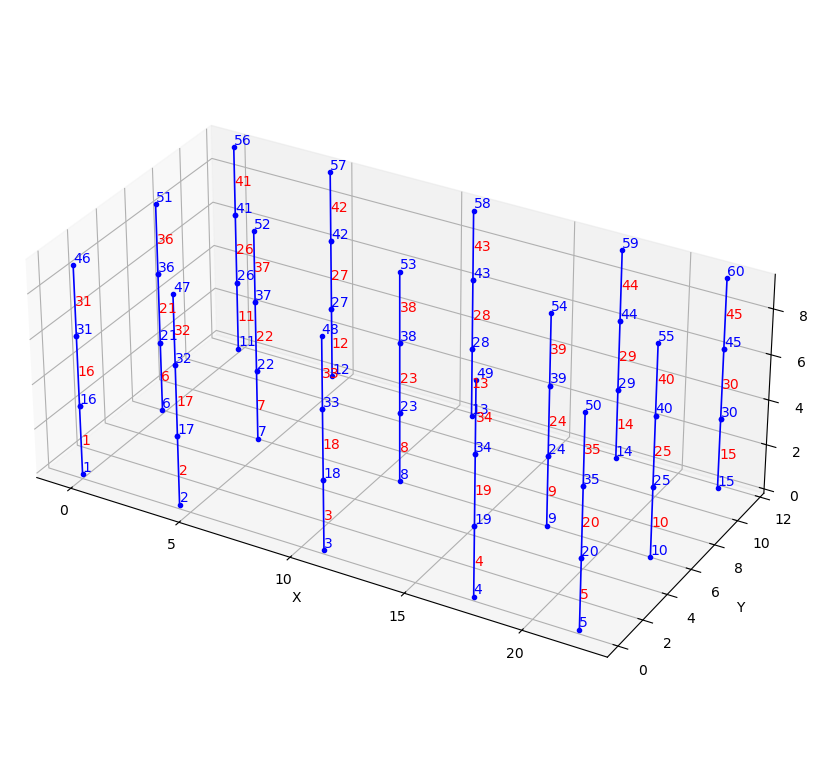

In [26]:
# ============================================
# DEFINICIÓN DE COLUMNAS
# ============================================

nIpcol=5                                                       # Número de puntos de integración para columnas
ops.beamIntegration('Lobatto', 1, 2, nIpcol)                   # Integración de Lobatto para columnas
for i in range(1,46):                                          
    ops.element('dispBeamColumn',i,*[i,i+15],1,1,'-cMass',0)   # Creación de columnas entre pisos 1-2 y 2-3
opsv.plot_model(fig_wi_he=(50,25), local_axes=False,gauss_points=False,axis_off=0)      # Visualizar modelo

Paso X: Definición de vigas

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

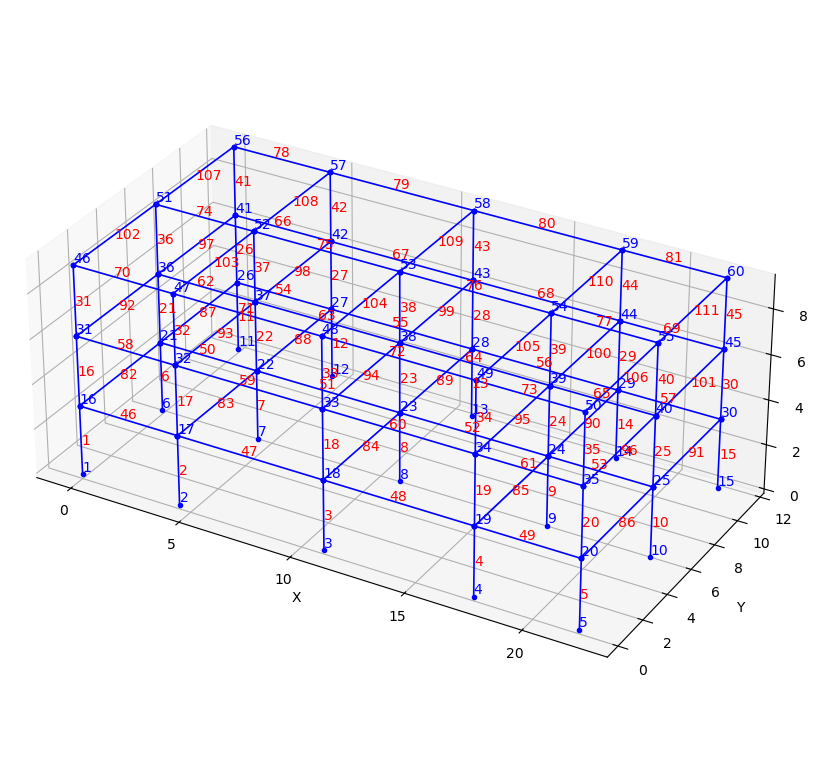

In [27]:
# ============================================
# DEFINICIÓN DE VIGAS
# ============================================

nIpvig=3                                      # Número de puntos de integración para vigas
ops.beamIntegration('Lobatto', 2, 1, nIpcol)  # Integración de Lobatto para vigas

#Creación de vigas piso en sentido X
for i in range(16,20):
    ops.element("dispBeamColumn",30+i,*[i,i+1],2,2,'-cMass',0)
for i in range(21,25):
    ops.element("dispBeamColumn",29+i,*[i,i+1],2,2,'-cMass',0)    
for i in range(26,30):
    ops.element("dispBeamColumn",28+i,*[i,i+1],2,2,'-cMass',0)
for i in range(31,35):
    ops.element("dispBeamColumn",27+i,*[i,i+1],2,2,'-cMass',0)
for i in range(36,40):
    ops.element("dispBeamColumn",26+i,*[i,i+1],2,2,'-cMass',0)
for i in range(41,45):
    ops.element("dispBeamColumn",25+i,*[i,i+1],2,2,'-cMass',0)
for i in range(46,50):
    ops.element("dispBeamColumn",24+i,*[i,i+1],2,2,'-cMass',0)
for i in range(51,55):
    ops.element("dispBeamColumn",23+i,*[i,i+1],2,2,'-cMass',0)
for i in range(56,60):
    ops.element("dispBeamColumn",22+i,*[i,i+1],2,2,'-cMass',0)

    
#Creación de vigas piso en sentido Y
for i in range(16,21):
    ops.element("dispBeamColumn",66+i,*[i,i+5],2,2,'-cMass',0)
for i in range(21,26):
    ops.element("dispBeamColumn",66+i,*[i,i+5],2,2,'-cMass',0)
for i in range(31,36):
    ops.element("dispBeamColumn",61+i,*[i,i+5],2,2,'-cMass',0)
for i in range(36,41):
    ops.element("dispBeamColumn",61+i,*[i,i+5],2,2,'-cMass',0)
for i in range(46,51):
    ops.element("dispBeamColumn",56+i,*[i,i+5],2,2,'-cMass',0)
for i in range(51,56):
    ops.element("dispBeamColumn",56+i,*[i,i+5],2,2,'-cMass',0)

opsv.plot_model(fig_wi_he=(50,25), local_axes=False,gauss_points=False,axis_off=0)  # Visualizar modelo

Paso X: Definición de condiciones de apoyo

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

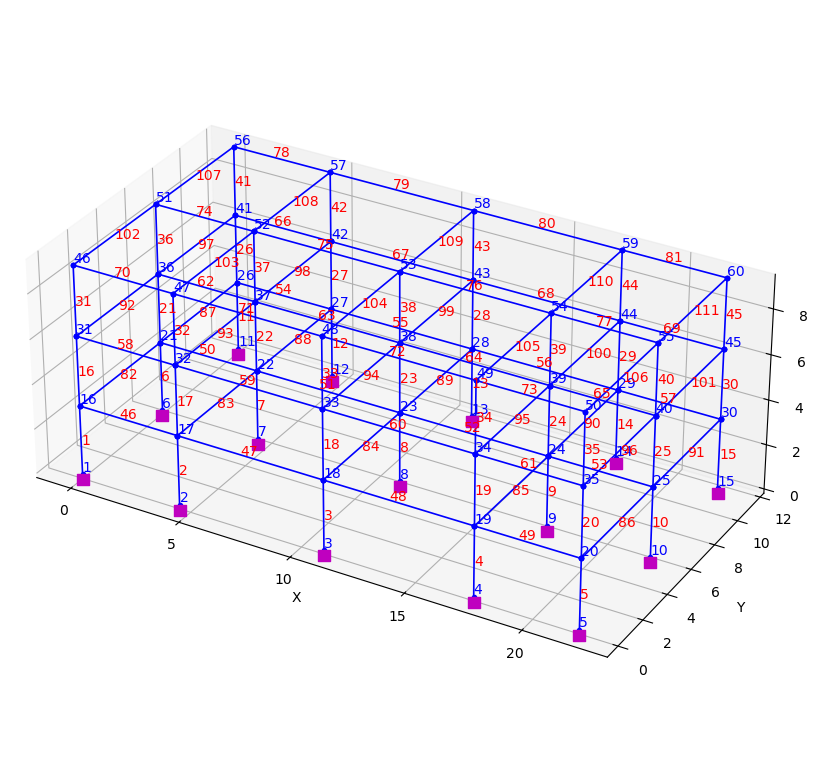

In [28]:
# ============================================
# DEFINICIÓN DE CONDICIONES DE APOYO
# ============================================

# Definir apoyos fijos en los nodos de la base (1 a 15)
for i in range(1, 16):
    ops.fix(i, 1, 1, 1, 1, 1, 1)
opsv.plot_model(fig_wi_he=(50,25), local_axes=False,gauss_points=False,axis_off=0)  # Visualizar modelo


Paso X : Definición de diafragmas rígidos

In [29]:
# ============================================
# DEFINICIÓN DE DIAGRAGMAS RÍGIDOS
# ============================================

nodo_maestro_p2=23    # Nodo maestro piso 2
nodo_maestro_p3=38    # Nodo maestro piso 3
nodo_maestro_cub=53   # Nodo maestro cubierta
ops.rigidDiaphragm(3,nodo_maestro_p2,*nodos_piso2)     # Diafragma Piso 2
ops.rigidDiaphragm(3,nodo_maestro_p3,*nodos_piso3)     # Diafragma Piso 3
ops.rigidDiaphragm(3,nodo_maestro_cub,*nodos_cubierta) # Diafragma Cubierta

RigidDiaphragm::RigidDiaphragm - retained node 23 is in constrained node list
RigidDiaphragm::RigidDiaphragm - retained node 38 is in constrained node list
RigidDiaphragm::RigidDiaphragm - retained node 53 is in constrained node list


Paso X: Cálculo de cargas

In [30]:
# ============================================
# CÁLCULO DE CARGAS MUERTAS Y VIVAS
# ============================================

# -----------------------
# CÁLCULO DE PESO PROPIO 
# -----------------------

ρconcreto = 24*kN/m**3            # Densidad del concreto de columnas

# 1. Peso propio de columnas
Wcol1 = ρconcreto * b2 * h2 * H1 / Apiso  # Peso propio de columnas piso 1
Wcol2 = ρconcreto * b2 * h2 * H2 / Apiso  # Peso propio de columnas piso 2
Wcol3 = ρconcreto * b2 * h2 * H3 / Apiso  # Peso propio de columnas piso 3

# 2. Peso propio de vigas
Wvig1a5 = ρconcreto * b1 * h1 * (LAB+LBC) / Apiso           # Peso propio de vigas de ejes 1 a 5
WvigAaC = ρconcreto * b1 * h1 * (L12+L23+L34+L45) / Apiso   # Peso propio de vigas de ejes A, B y C   

# 3. Peso de losa aligerada unidireccional
eloseta = 0.05*m       # Espesor de losa
bviguetas = 0.12*m     # Ancho de viguetas
hviguetas = 0.35*m     # Peralte de viguetas
Sviguetas = 1.20*m     # Separación entre viguetas
Wlosa = ρconcreto * (eloseta + (bviguetas*hviguetas/Sviguetas))  # Peso propio de losa aligerada


# -----------------------
# CÁLCULO DE CARGA MUERTA 
# -----------------------

Wcielo = 0.10*kN/m**2                  # Carga muerta de cielo raso - Tableros de yeso 1/2" espesor
Wpisos = 1.10*kN/m**2                  # Carga muerta de acabados de pisos - Baldosa cerámica (20mm) sobre 25mm de mortero
Wmuros = 2.50*kN/m**2                  # Carga muerta de muros divisorios - Mampostería de bloque de arcilla 15cm de espesor pañetado en ambas caras
Wentrepiso = Wcielo + Wpisos + Wmuros  # Carga muerta total de entrepiso

Wcubierta = 0.20*kN/m**2               # Carga muerta de cubierta

# -----------------------
# CÁLCULO DE CARGA VIVA
# -----------------------

Wviva = 1.80*kN/m**2                  # Carga viva de uso residencial

# -----------------------
# MAYORACIÓN DE CARGAS
# -----------------------

γCM = 1.2                                                      # Factor de mayoración para carga muerta
γCV = 1.6                                                      # Factor de mayoración para carga viva
CM2 = γCM * (Wcol2 + Wvig1a5 + WvigAaC + Wlosa + Wentrepiso)   # Carga muerta mayorada piso 2
CM3 = γCM * (Wcol3 + Wvig1a5 + WvigAaC + Wlosa + Wentrepiso)   # Carga muerta mayorada piso 3
CMcub = γCM * (Wvig1a5 + WvigAaC + Wcubierta)                  # Carga muerta mayorada cubierta
CV = γCV * Wviva * 0.25                                        # Carga viva mayorada (25% de la carga viva)

Cp2 = (CM2 + CV)/g      # Subtotal Masa total piso 2
Cp3 = (CM3 + CV)/g      # Subtotal Masa total piso 3
Cpcub = (CMcub + CV)/g  # Subtotal Masa total cubierta

Mp2 = Cp2 * Apiso       # Masa total piso 2
Mp3 = Cp3 * Apiso       # Masa total piso 3
Mpcub = Cpcub * Apiso   # Masa total cubierta
Mtotal= Mp2+Mp3+Mpcub   # Masa total del edificio

# -----------------------------------
# CÁLCULO DE ÁREAS AFERENTES POR NODO
# -----------------------------------

AFN1A = L12/2 * LAB/2                      #Área aferente de los nodos 1A
AFN2A = (L12/2 + L23/2) * LAB/2            #Área aferente de los nodos 2A
AFN3A = (L23/2 + L34/2) * LAB/2            #Área aferente de los nodos 3A
AFN4A = (L34/2 + L45/2) * LAB/2            #Área aferente de los nodos 4A
AFN5A = L45/2 * LAB/2                      #Área aferente de los nodos 5A
AFN1B = (LAB/2 + LBC/2) * L12/2            #Área aferente de los nodos 1B
AFN2B = (LAB/2 + LBC/2) * (L12/2 + L23/2)  #Área aferente de los nodos 2B
AFN3B = (LAB/2 + LBC/2) * (L23/2 + L34/2)  #Área aferente de los nodos 3B
AFN4B = (LAB/2 + LBC/2) * (L34/2 + L45/2)  #Área aferente de los nodos 4B
AFN5B = (LAB/2 + LBC/2) * L45/2            #Área aferente de los nodos 5B              
AFN1C = L12/2 * LBC/2                      #Área aferente de los nodos 1C
AFN2C = (L12/2 + L23/2) * LBC/2            #Área aferente de los nodos 2C
AFN3C = (L23/2 + L34/2) * LBC/2            #Área aferente de los nodos 3C
AFN4C = (L34/2 + L45/2) * LBC/2            #Área aferente de los nodos 4C
AFN5C = L45/2 * LBC/2                      #Área aferente de los nodos 5C


Paso X: Aplicación de cargas

In [31]:
# ===================================================================================
# ASIGNACIÓN DE MASAS A NODOS (Paso opcional, sólo requerido para análisis dinámicos)
# ===================================================================================

# ASIGNACIÓN DE MASAS EN NODOS PISO 2
# A cada nodo se le asigna la masa correspondiente a la carga muerta y viva mayoradas multiplicada por su área aferente
ops.mass(16,Cp2*AFN1A,Cp2*AFN1A,Cp2*AFN1A,0,0,0)
ops.mass(17,Cp2*AFN2A,Cp2*AFN2A,Cp2*AFN2A,0,0,0)
ops.mass(18,Cp2*AFN3A,Cp2*AFN3A,Cp2*AFN3A,0,0,0)
ops.mass(19,Cp2*AFN4A,Cp2*AFN4A,Cp2*AFN4A,0,0,0)
ops.mass(20,Cp2*AFN5A,Cp2*AFN5A,Cp2*AFN5A,0,0,0)
ops.mass(21,Cp2*AFN1B,Cp2*AFN1B,Cp2*AFN1B,0,0,0)
ops.mass(22,Cp2*AFN2B,Cp2*AFN2B,Cp2*AFN2B,0,0,0)
ops.mass(23,Cp2*AFN3B,Cp2*AFN3B,Cp2*AFN3B,0,0,0)
ops.mass(24,Cp2*AFN4B,Cp2*AFN4B,Cp2*AFN4B,0,0,0)
ops.mass(25,Cp2*AFN5B,Cp2*AFN5B,Cp2*AFN5B,0,0,0)
ops.mass(26,Cp2*AFN1C,Cp2*AFN1C,Cp2*AFN1C,0,0,0)
ops.mass(27,Cp2*AFN2C,Cp2*AFN2C,Cp2*AFN2C,0,0,0)
ops.mass(28,Cp2*AFN3C,Cp2*AFN3C,Cp2*AFN3C,0,0,0)
ops.mass(29,Cp2*AFN4C,Cp2*AFN4C,Cp2*AFN4C,0,0,0)
ops.mass(30,Cp2*AFN5C,Cp2*AFN5C,Cp2*AFN5C,0,0,0)
#-----------------------------------------------
# ASIGNACIÓN DE MASAS EN NODOS PISO 3
ops.mass(31,Cp3*AFN1A,Cp3*AFN1A,Cp3*AFN1A,0,0,0)
ops.mass(32,Cp3*AFN2A,Cp3*AFN2A,Cp3*AFN2A,0,0,0)
ops.mass(33,Cp3*AFN3A,Cp3*AFN3A,Cp3*AFN3A,0,0,0)
ops.mass(34 ,Cp3*AFN4A,Cp3*AFN4A,Cp3*AFN4A,0,0,0)
ops.mass(35 ,Cp3*AFN5A,Cp3*AFN5A,Cp3*AFN5A,0,0,0)
ops.mass(36 ,Cp3*AFN1B,Cp3*AFN1B,Cp3*AFN1B,0,0,0)
ops.mass(37 ,Cp3*AFN2B,Cp3*AFN2B,Cp3*AFN2B,0,0,0)
ops.mass(38 ,Cp3*AFN3B,Cp3*AFN3B,Cp3*AFN3B,0,0,0)
ops.mass(39 ,Cp3*AFN4B,Cp3*AFN4B,Cp3*AFN4B,0,0,0)
ops.mass(40 ,Cp3*AFN5B,Cp3*AFN5B,Cp3*AFN5B,0,0,0)
ops.mass(41 ,Cp3*AFN1C,Cp3*AFN1C,Cp3*AFN1C,0,0,0)
ops.mass(42 ,Cp3*AFN2C,Cp3*AFN2C,Cp3*AFN2C,0,0,0)
ops.mass(43 ,Cp3*AFN3C,Cp3*AFN3C,Cp3*AFN3C,0,0,0)
ops.mass(44 ,Cp3*AFN4C,Cp3*AFN4C,Cp3*AFN4C,0,0,0)
ops.mass(45 ,Cp3*AFN5C,Cp3*AFN5C,Cp3*AFN5C,0,0,0)
#-----------------------------------------------
# ASIGNACIÓN DE MASAS EN NODOS DE CUBIERTA
ops.mass(46,Cpcub*AFN1A,Cpcub*AFN1A,Cpcub*AFN1A,0,0,0)
ops.mass(47,Cpcub*AFN2A,Cpcub*AFN2A,Cpcub*AFN2A,0,0,0)
ops.mass(48,Cpcub*AFN3A,Cpcub*AFN3A,Cpcub*AFN3A,0,0,0)
ops.mass(49,Cpcub*AFN4A,Cpcub*AFN4A,Cpcub*AFN4A,0,0,0)
ops.mass(50,Cpcub*AFN5A,Cpcub*AFN5A,Cpcub*AFN5A,0,0,0)
ops.mass(51,Cpcub*AFN1B,Cpcub*AFN1B,Cpcub*AFN1B,0,0,0)
ops.mass(52,Cpcub*AFN2B,Cpcub*AFN2B,Cpcub*AFN2B,0,0,0)
ops.mass(53,Cpcub*AFN3B,Cpcub*AFN3B,Cpcub*AFN3B,0,0,0)
ops.mass(54,Cpcub*AFN4B,Cpcub*AFN4B,Cpcub*AFN4B,0,0,0)
ops.mass(55,Cpcub*AFN5B,Cpcub*AFN5B,Cpcub*AFN5B,0,0,0)
ops.mass(56,Cpcub*AFN1C,Cpcub*AFN1C,Cpcub*AFN1C,0,0,0)
ops.mass(57,Cpcub*AFN2C,Cpcub*AFN2C,Cpcub*AFN2C,0,0,0)
ops.mass(58,Cpcub*AFN3C,Cpcub*AFN3C,Cpcub*AFN3C,0,0,0)
ops.mass(59,Cpcub*AFN4C,Cpcub*AFN4C,Cpcub*AFN4C,0,0,0)
ops.mass(60,Cpcub*AFN5C,Cpcub*AFN5C,Cpcub*AFN5C,0,0,0)
# ============================================




Paso X: Asignación de cargas a vigas

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

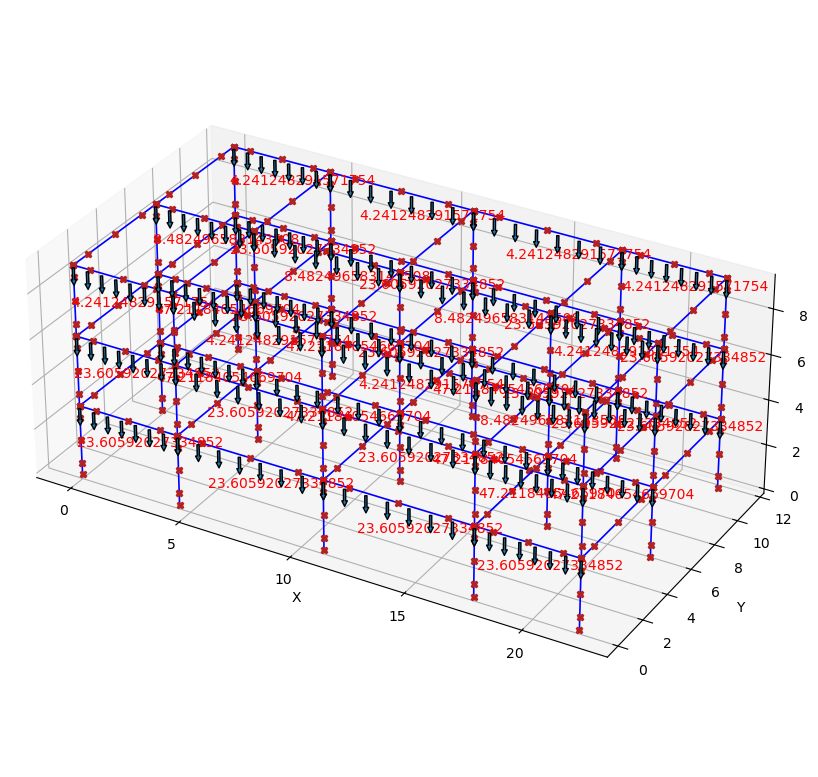

In [32]:
# ==================================================
# ASIGNACIÓN DE CARGAS VERTICALES EN VIGAS
# ==================================================

ops.timeSeries("Linear",1)
ops.pattern("Plain",1,1)

for i in range(46,50):
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp2*g*LAB/2,0)             # Carga vertical en vigas del piso 2 eje A
for i in range(50,54):
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp2*g*(LAB/2 + LBC/2),0)   # Carga vertical en vigas del piso 2 eje B
for i in range(54,58):
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp2*g*LBC/2,0)             # Carga vertical en vigas del piso 2 eje C
for i in range(58,61):
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp3*g*LAB/2,0)             # Carga vertical en vigas del piso 3 eje A
for i in range(61,65):
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp3*g*(LAB/2 + LBC/2),0)   # Carga vertical en vigas del piso 3 eje B
for i in range(65,70):
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp3*g*LBC/2,0)             # Carga vertical en vigas del piso 3 eje C
for i in range(70,73):
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cpcub*g*LAB/2,0)           # Carga vertical en vigas de cubierta eje A
for i in range(73,77):
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cpcub*g*(LAB/2 + LBC/2),0) # Carga vertical en vigas de cubierta eje B
for i in range(77,82):
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cpcub*g*LBC/2,0)           # Carga vertical en vigas de cubierta eje C

# Visualizar modelo
opsv.plot_load(nep=8, sfac=True, fig_wi_he=(50,25), fig_lbrt=False, fmt_model_loads={'color': 'blue', 'linestyle': 'solid', 'linewidth': 1.2, 'marker': '', 'markersize': 1}, node_supports=False, truss_node_offset=0, local_axes=False, ax=False)

Paso X: Configuración del análisis

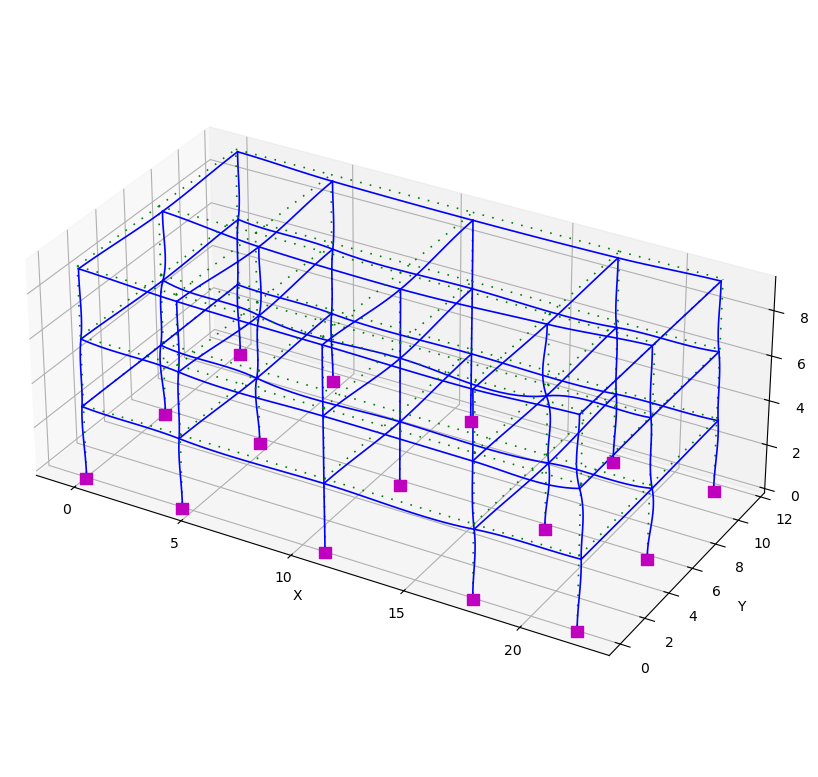

In [33]:
# ===============================================
# CONFIGURACIÓN Y EJECUCIÓN DEL ANÁLISIS ESTÁTICO
# ===============================================

pasos_grav = 10                            # Número de incrementos de carga para análisis de carga gravitacional
ops.constraints("Plain")                   # Tratamiento de restricciones
ops.numberer("RCM")                        # Renumeración de nodos
ops.system("BandGeneral")                  # Sistema de ecuaciones
ops.test("NormDispIncr",1.0e-5,100)        # Criterio de convergencia
ops.algorithm("Newton")                    # Algoritmo de solución
ops.integrator("LoadControl",1/pasos_grav) # Integrador de control de carga
ops.analysis("Static")                     # Análisis estático
ops.analyze(pasos_grav)                    # Ejecutar análisis
opsv.plot_defo(1e3, fig_wi_he=(50,25))     # Visualizar modelo deformado
ops.loadConst('-time', 0.0)                # Anclar cargas aplicadas para análisis posterior

Paso X: Configuración de análisis de Pushover

In [34]:
# ==================================================
# CONFIGURACIÓN DEL ANÁLISIS DE PUSHOVER
# ==================================================

ops.timeSeries("Linear",2)   # Definir serie de tiempo para análisis pushover
ops.pattern("Plain",2,2)     # Definir patrón de carga para análisis pushover

# ------------------------------------------------------------------
# DEFINICIÓN DE VECTOR DE CARGAS LATERALES POR DISTRIBUCIÓN DE MASAS
# ------------------------------------------------------------------

M2h2 = Mp2 * H1                                # Masa de piso 2 por altura de piso 2           
M3h3 = Mp3 * (H1+H2)                           # Masa de piso 3 por altura total hasta piso 3
Mchc = Mpcub * (H1+H2+H3)                      # Masa de cubierta por altura total hasta cubierta
SumaMh= M2h2 + M3h3 + Mchc                     # Suma de momentos de masa por altura
patron=[M2h2/SumaMh, M3h3/SumaMh,Mchc/SumaMh]  # Vector de distribución de cargas laterales por piso

# ------------------------------------------------------
# APLICACIÓN DE CARGAS LATERALES EN NODOS MAESTROS
# ------------------------------------------------------

FpushX = 10*kN     # Fuerza lateral inicial aplicada en el análisis pushover
FpushY = 10*kN     # Fuerza lateral inicial aplicada en el análisis pushover
ops.load(nodo_maestro_p2, FpushX*patron[0], 0, 0, 0, 0, 0)   # Carga lateral en X en nodo maestro piso 2
ops.load(nodo_maestro_p3, FpushX*patron[1], 0, 0, 0, 0, 0)   # Carga lateral en X en nodo maestro piso 3
ops.load(nodo_maestro_cub,FpushX*patron[2], 0, 0, 0, 0, 0)   # Carga lateral en X en nodo maestro cubierta

ops.load(nodo_maestro_p2, 0, FpushY*patron[0], 0, 0, 0, 0)   # Carga lateral en Y en nodo maestro piso 2
ops.load(nodo_maestro_p3, 0, FpushY*patron[1], 0, 0, 0, 0)   # Carga lateral en Y en nodo maestro piso 3
ops.load(nodo_maestro_cub,0, FpushY*patron[2], 0, 0, 0, 0)   # Carga lateral en Y en nodo maestro cubierta

# ----------------------------------------
# DEFINICIÓN DE CONTROL DE DESPLAZAMIENTO 
# ----------------------------------------

control_dof= 1                  # Grado de libertad de control (1=X, 2=Y, 3=Z)
control_nodo= nodo_maestro_cub  # Nodo maestro de control (nodo de cubierta)
dU= 1*mm                        # Incremento de desplazamiento por paso

# ----------------------------------------
# DEFINICIÓN DE RECORDERS DE SALIDA
# ----------------------------------------

# Recorder de desplazamientos del nodo de control
ops.recorder("Node", "-file", "desplazamientos.txt", "-time", "-node", control_nodo, "-dof", 1,2,3, "disp")
# Recorder de reacciones en la base
ops.recorder("Node", "-file", "reacciones_base.txt", "-time", "-node", *nodos_piso1, "-dof", 1,2,3, "reaction")
# Recorder de fuerzas internas en columnas
ops.recorder("Element", "-file", "fuerzas_columnas.txt", "-time", "-ele", *range(1,46), "localForce")
# Recorder de fuerzas internas en vigas
ops.recorder("Element", "-file", "fuerzas_vigas.txt", "-time", "-ele", *range(47,112), "localForce")

# ----------------------------------------
# CONFIGURACIÓN DE ANÁLISIS PARA PUSHOVER
# ----------------------------------------

ops.wipeAnalysis()
ops.constraints('Transformation')
ops.numberer('RCM')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-2, 25)
ops.algorithm('ModifiedNewton', '-initial')
ops.integrator("DisplacementControl",control_nodo, control_dof, dU)
ops.analysis('Static')
  

desp_obj= 0.50*m                #Definición de desplazamiento objetivo
pasos_push=int(desp_obj / dU)   #Cantidad de pasos en los que se realizará el análisis
desp_actual = 0                 #Variable para monitoreo de desplazamientos
cortante_basal=0                #Variable para monitoreo de cortante en la base
max_cortante = 0                #Variable para monitoreo de pérdida de resistencia
deriva_max = 0.05               #Límite de deriva total del edificio para detener el análisis (5%)


Paso X : Ejecución del análisis Pushover

In [35]:
# ==================================================
# EJECUCIÓN DEL ANÁLISIS DE PUSHOVER
# ==================================================

cortante_basal_historial = []  #Vector que registra el cortante basal en cada paso
desplazamiento_historial = []  #Vector que registra el desplazamiento en cada paso
deriva_historial = []          #Vector que registra la deriva total del edificio en cada paso

# Ejecución del análisis
for paso in range(pasos_push):
    ok = ops.analyze(1)
   
    if ok != 0:
        print(f"Análisis terminado en paso {paso} por falta de convergencia")    #Detiene el análisis si no se logra convergencia
        break
    
    # ---- CALCULAR DESPLAZAMIENTO Y DERIVA ----
    desp_actual = ops.nodeDisp(control_nodo, control_dof)   #Se calcula el desplazamiento del nodo de control en cada paso
    deriva = desp_actual / (H1 + H2 + H3)                   #Se calcula la deriva total del edificio en cada paso
    desplazamiento_historial.append(desp_actual)            #Se registra el desplazamiento del nodo de control en el vector historial
    deriva_historial.append(deriva)                         #Se registra la deriva del edificio en el vector historial
    
    # ---- CALCULAR CORTANTE BASAL----
    cortante_basal=0
    for nodo in nodos_piso1:
        reaccion = ops.nodeReaction(nodo, control_dof)     #Se calcula la reacción de todos los nodos de la base en cada paso
        cortante_basal += abs(reaccion)                    #Se suma la reacción de todos los nodos de la base en cada paso para calcular el cortante basal
    
    cortante_basal_historial.append(cortante_basal)        #Se registra la reacción del cortante basal en el vector historial
    
    # ---- ACTUALIZAR CORTANTE MÁXIMO ----
    
    if max_cortante == 0:           
        max_cortante = cortante_basal
    else:
        max_cortante = max(max_cortante, cortante_basal)
    
    # ---- CRITERIO 1: EXCESO DE DERIVA ----
    if deriva > deriva_max:
        print(f"Análisis terminado: drift ratio {deriva*100:.2f}% "   #Detiene el análisis si se supera la deriva máxima
              f"excede límite de {deriva_max*100:.2f}%")
        break
    
    # ---- CRITERIO 2: PÉRDIDA DE RESISTENCIA ----
    if paso > 10 and cortante_basal < 0.8 * max_cortante:
        print(f"Análisis terminado en paso {paso}: Pérdida significativa de resistencia")  #Detiene el análisis si se detecta pérdida de resistencia
        print(f"Cortante máximo: {max_cortante:.2f} kN")
        print(f"Cortante actual: {cortante_basal:.2f} kN")
        break
    


# ========================================
# RESULTADOS FINALES DEL ANÁLISIS
# ========================================

#Genera el título
print("\n" + "="*50)                                          
print("RESULTADOS DEL ANÁLISIS DE PUSHOVER")                    
print("="*50)

desp_final = ops.nodeDisp(control_nodo, control_dof)         #Título de resultados finales
cortante_final = 0.0                                         #Variable de cortante final

for nodo in nodos_piso1:
    reaccion = ops.nodeReaction(nodo, control_dof)           #Calcula el cortante de cada nodo en cada paso
    cortante_final += abs(reaccion)                          #Calcula el cortante en el paso final

print(f"Número de pasos completados: {paso}")                #Presenta el número de pasos completados
print(f"Desplazamiento final: {desp_final/mm:.2f} mm")       #Presenta el desplazamiento final
print(f"Cortante basal final: {cortante_final/kN:.2f} kN")   #Presenta el cortante basal final
print(f"Cortante basal máximo: {max_cortante/kN:.2f} kN")    #Presenta el cortante basal máximo
print(f"Deriva final: {(desp_final/(H1+H2+H3))*100:.2f}%")   #Presenta la deriva final

# ========================================
# CONVERTIR A ARRAYS DE NUMPY
# ========================================

cortante_basal_historial = np.array(cortante_basal_historial) #Convierte el vector de historial de cortante basal a Array de Numpy
desplazamiento_historial = np.array(desplazamiento_historial) #Convierte el vector de historial de desplazamiento a Array de Numpy
deriva_historial = np.array(deriva_historial)                 #Convierte el vector de historial de deriva total  a Array de Numpy


Análisis terminado: drift ratio 5.00% excede límite de 5.00%

RESULTADOS DEL ANÁLISIS DE PUSHOVER
Número de pasos completados: 464
Desplazamiento final: 465.04 mm
Cortante basal final: 2520.68 kN
Cortante basal máximo: 2520.68 kN
Deriva final: 5.00%


In [36]:
# ==================================================
# PROCESAMIENTO DE DATOS DE SALIDA
# ==================================================

datos_desp = np.loadtxt('desplazamientos.txt')   #Lectura de datos de desplazamiento
pasos_tiempo = datos_desp[:, 0]                  #Lectura de datos de pasos de tiempo
desplazamientoX = datos_desp[:, 1]               #Lectura de datos de desplazamiento en X
desplazamientoY = datos_desp[:, 2]               #Lectura de datos de desplazamiento en Y
desplazamientoZ = datos_desp[:, 3]               #Lectura de datos de desplazamiento en Z


Paso X : Generar la curva Pushover

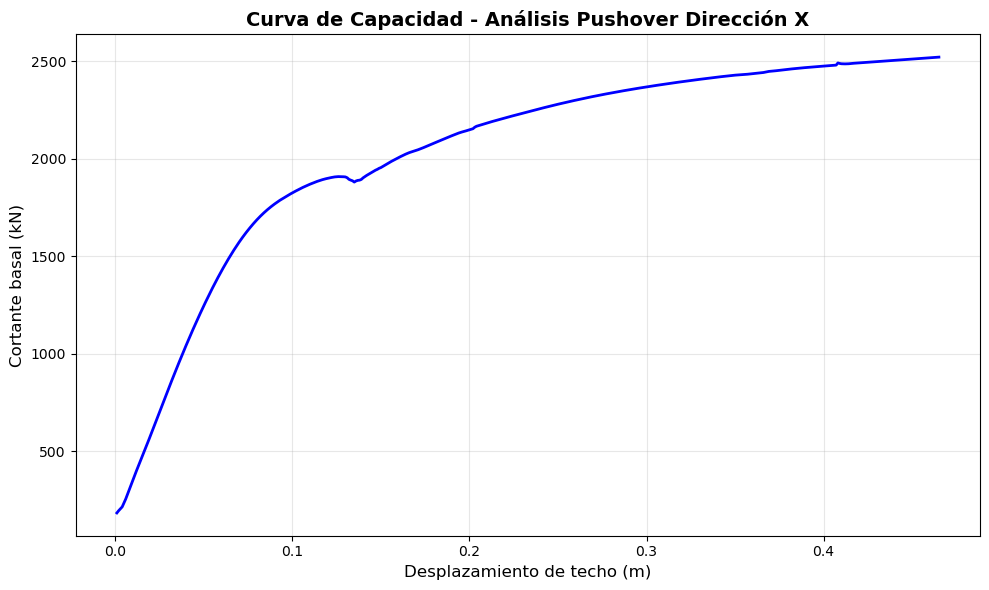

In [37]:
# ==================================================
# GRAFICACIÓN DE CURVA PUSHOVER
# ==================================================

plt.figure(figsize=(10, 6))
plt.plot(desplazamientoX, cortante_basal_historial, 'b-', linewidth=2)
plt.xlabel('Desplazamiento de techo (m)', fontsize=12)
plt.ylabel('Cortante basal (kN)', fontsize=12)
plt.title('Curva de Capacidad - Análisis Pushover Dirección X', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('curva_pushover.png', dpi=600)
plt.show()
